In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from tqdm import tqdm

from nltk.tokenize import word_tokenize
from gensim.models.fasttext import FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-dataset/Dataset_User_Agreement.pdf
/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json


In [2]:
path = "../input/yelp-dataset/yelp_academic_dataset_tip.json"
df = pd.read_json(path, lines = True)
df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [3]:
df.shape

(908915, 5)

In [4]:
df.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [5]:
df_sample = df[:10_000]

In [6]:
data = df_sample.loc[0:, 'text'].tolist()

In [7]:
data[0:5]

['Avengers time with the ladies.',
 'They have lots of good deserts and tasty cuban sandwiches',
 "It's open even when you think it isn't",
 'Very decent fried chicken',
 'Appetizers.. platter special for lunch']

### Remove Extra WhiteSpaces from text

In [8]:
def remove_extra_spaces(text):
    text = text.strip()
    return " ".join(text.split())

In [9]:
data = list(map(lambda text: remove_extra_spaces(text), data))

In [10]:
data[0:5]

['Avengers time with the ladies.',
 'They have lots of good deserts and tasty cuban sandwiches',
 "It's open even when you think it isn't",
 'Very decent fried chicken',
 'Appetizers.. platter special for lunch']

### Remove all special characters 

In [11]:
def remove_special_chars(text):
    return re.sub('\W+',' ', text)

In [12]:
data = list(map(lambda text: remove_special_chars(text), data))

In [13]:
data[0:5]

['Avengers time with the ladies ',
 'They have lots of good deserts and tasty cuban sandwiches',
 'It s open even when you think it isn t',
 'Very decent fried chicken',
 'Appetizers platter special for lunch']

### Remove Single Characters in text

In [14]:
def remove_single_chars(text):
    return ' '.join([w for w in text.split() if len(w)>1])

In [15]:
data = list(map(lambda text: remove_single_chars(text), data))

In [16]:
data[0:5]

['Avengers time with the ladies',
 'They have lots of good deserts and tasty cuban sandwiches',
 'It open even when you think it isn',
 'Very decent fried chicken',
 'Appetizers platter special for lunch']

### Convert text to lower

In [17]:
def convert_to_lower(text):
    return text.lower()

In [18]:
data = list(map(lambda text: convert_to_lower(text), data))

In [19]:
data[0:5]

['avengers time with the ladies',
 'they have lots of good deserts and tasty cuban sandwiches',
 'it open even when you think it isn',
 'very decent fried chicken',
 'appetizers platter special for lunch']

In [20]:
tokenized = []
for i in range(0, len(data)):
    tokenized.append(word_tokenize(data[i]))

### Tokenization

In [21]:
tokenized[0:5]

[['avengers', 'time', 'with', 'the', 'ladies'],
 ['they',
  'have',
  'lots',
  'of',
  'good',
  'deserts',
  'and',
  'tasty',
  'cuban',
  'sandwiches'],
 ['it', 'open', 'even', 'when', 'you', 'think', 'it', 'isn'],
 ['very', 'decent', 'fried', 'chicken'],
 ['appetizers', 'platter', 'special', 'for', 'lunch']]

### Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [24]:
lemmatized = []
for i in range(0, len(tokenized)):
    for j in range(0, len(tokenized[i])):
        lemmatized.append(lemmatizer.lemmatize(tokenized[i][j]))

In [25]:
lemmatized[0:20]

['avenger',
 'time',
 'with',
 'the',
 'lady',
 'they',
 'have',
 'lot',
 'of',
 'good',
 'desert',
 'and',
 'tasty',
 'cuban',
 'sandwich',
 'it',
 'open',
 'even',
 'when',
 'you']

### Remove StopWords

In [26]:
from nltk.corpus import stopwords
  
stop_words = set(stopwords.words('english'))
  
filtered_data = [word for word in lemmatized if not word in stop_words]
  

In [27]:
filtered_data[0:20]

['avenger',
 'time',
 'lady',
 'lot',
 'good',
 'desert',
 'tasty',
 'cuban',
 'sandwich',
 'open',
 'even',
 'think',
 'decent',
 'fried',
 'chicken',
 'appetizer',
 'platter',
 'special',
 'lunch',
 'chili']

### Remove words length less than 3

In [28]:
def remove_long_words(word):
    return re.sub(r'\b\w{1,3}\b', '', word)

In [29]:
data = list(map(lambda word: remove_long_words(word), filtered_data))

In [30]:
data[0:10]

['avenger',
 'time',
 'lady',
 '',
 'good',
 'desert',
 'tasty',
 'cuban',
 'sandwich',
 'open']

In [31]:
data_cleaned = []
for i in data:
    if i != '':
        data_cleaned.append(i)

In [32]:
data_cleaned[0:10]

['avenger',
 'time',
 'lady',
 'good',
 'desert',
 'tasty',
 'cuban',
 'sandwich',
 'open',
 'even']

In [33]:
word_tokenizer = nltk.WordPunctTokenizer()
word_tokens = [word_tokenizer.tokenize(sent) for sent in tqdm(data_cleaned)]

100%|██████████| 56403/56403 [00:00<00:00, 153440.59it/s]


In [34]:
word_tokens[0:10]

[['avenger'],
 ['time'],
 ['lady'],
 ['good'],
 ['desert'],
 ['tasty'],
 ['cuban'],
 ['sandwich'],
 ['open'],
 ['even']]

### Train fastText word embeddings

In [35]:
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2

fast_Text_model = FastText(word_tokens,
                      vector_size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      epochs=150)

### Exploring FastText Model

In [36]:
fast_Text_model.wv['cat']

array([-7.13005420e-06, -1.87157802e-05, -7.86850869e-04, -1.08747881e-04,
       -1.15523813e-04,  5.14295360e-04,  5.06694836e-04,  3.26134352e-04,
        1.38953596e-03, -2.84209294e-04, -1.30470237e-03,  2.24846357e-04,
        1.97442525e-04,  3.89346038e-04,  6.23983564e-04,  5.51446574e-04,
        5.75571263e-04,  1.54703821e-03,  4.34491783e-04, -2.84285896e-04,
        2.49629287e-04, -8.27680167e-04, -1.76106041e-04, -7.88717356e-04,
       -1.39180920e-04,  3.65995686e-04, -1.45978120e-04,  5.88578347e-04,
       -3.75888631e-04,  2.73409009e-04,  3.29253526e-04, -9.59879893e-04,
        9.86192841e-04,  3.41818464e-04, -1.26705354e-03, -1.10788234e-04,
        1.40956731e-03, -6.53272902e-04, -7.80611124e-04, -3.38587328e-04,
        3.55134922e-04, -4.36491187e-04,  9.74150142e-04,  3.63435451e-04,
       -2.90167198e-04, -1.11054205e-05, -1.65382167e-03, -5.27845288e-04,
       -8.19815963e-04,  3.41984822e-04, -6.25228742e-04,  8.16801694e-05,
        1.07342785e-04,  

### Show most 10 not similar to a word

In [37]:
fast_Text_model.wv.most_similar(negative=["cat"], topn=10)

[('similar', 0.19435018301010132),
 ('brazilian', 0.17924325168132782),
 ('blood', 0.1743197739124298),
 ('simply', 0.16941459476947784),
 ('mimosa', 0.16594140231609344),
 ('first', 0.16075319051742554),
 ('hello', 0.1596033126115799),
 ('stellar', 0.15704688429832458),
 ('helpful', 0.1548035889863968),
 ('beyond', 0.1498652696609497)]

### Show most 10 similar to a word

In [38]:
fast_Text_model.wv.most_similar('cat', topn=10)

[('catch', 0.26898568868637085),
 ('catfish', 0.24275346100330353),
 ('goat', 0.20153744518756866),
 ('located', 0.20028027892112732),
 ('carne', 0.185199573636055),
 ('meat', 0.18500806391239166),
 ('carrot', 0.18442577123641968),
 ('possible', 0.18295633792877197),
 ('neat', 0.1786232441663742),
 ('cart', 0.17564652860164642)]

### Similarity between 2 words

In [39]:
fast_Text_model.wv.similarity('football', 'ball')

0.41555035

### t-sne plot for similarity between words

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


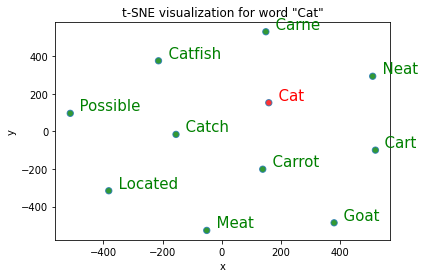

In [40]:
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained fastText model dimention
    dim_size = w2v_model.wv.vectors.shape[1]
 
    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']
 
    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.wv.__getitem__([for_word]), axis=0)
 
    # gets list of most similar words
    sim_words = w2v_model.wv.most_similar(for_word, topn=10)
 
    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
 
    #Apply PCA
    model_pca = PCA(n_components = 10).fit_transform(arrays)
 
    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)
 
    # Sets everything up to plot
    df_plot = pd.DataFrame({
        'x': [x for x in Y[:, 0]],
        'y': [y for y in Y[:, 1]],
        'words_name': word_labels,
        'words_color': color_list})
 
    #tsne plot
 
    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )
 
    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)
 
 
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
 
    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')

tsne_plot(for_word='cat', w2v_model=fast_Text_model)